# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [33]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Default, housing, and loan seem like they can be coerced into integer types to represent each category. Month is another feature that could be converted into integer values for ease of processing. The output variable, y, can also be transformed into a simple binary representation where 1 equals 'yes' and 0 equals 'no', which can very simply be done now as such:

In [35]:
y = y.map({'yes': 1, 'no': 0})

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The objective of the task is to identify which attributes of a campaign are the most likely to get a 'yes' from a customer to subscribe to a term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

The categorical variables according to the info above are from job to day_of_week and poutcome. We will use a LabelEncoder() object to encode these variables into ints, which we will then scale into floats. At that point, all the data types should be equivalent.

In [37]:
X = df.drop('y', axis=1)
y = df['y']

label_encoder = LabelEncoder()
features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for feature in features:
    X[feature] = label_encoder.fit_transform(X[feature])

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Now that we have our refined datasets, we can start the business objective to find the most important feature in getting a customer to subscribe to a term deposit.

In [69]:
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

           Feature  Importance
10        duration    0.321198
18       euribor3m    0.110960
0              age    0.091516
19     nr.employed    0.064933
1              job    0.048533
3        education    0.043140
11        campaign    0.042205
9      day_of_week    0.040222
12           pdays    0.030470
14        poutcome    0.027650
17   cons.conf.idx    0.026031
16  cons.price.idx    0.024141
2          marital    0.023316
5          housing    0.020083
15    emp.var.rate    0.019872
8            month    0.017475
13        previous    0.015293
6             loan    0.014820
7          contact    0.009638
4          default    0.008504


We can see that duration of the call is the most important feature. We can explore this further by graphing it against campaign.

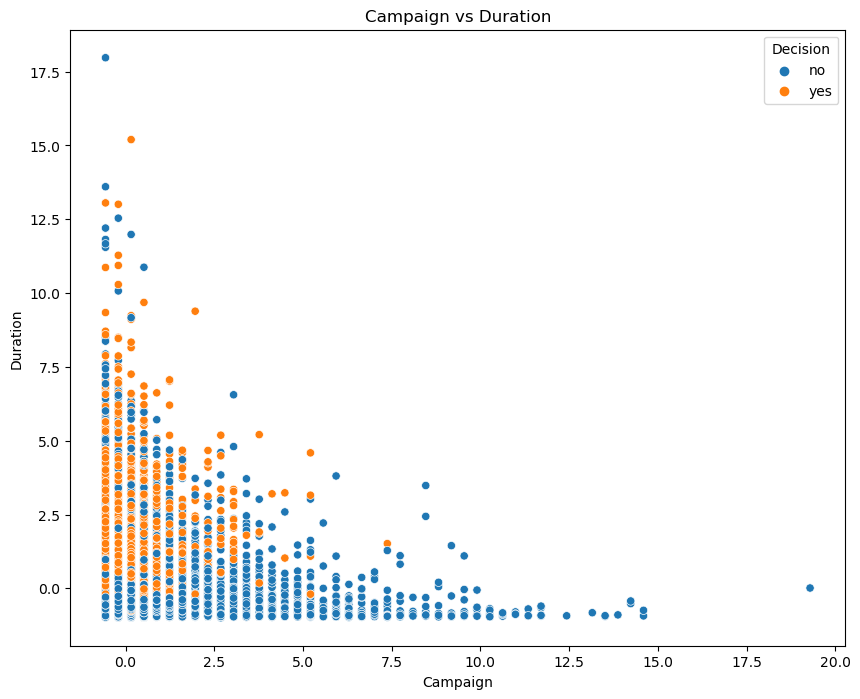

In [71]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X['campaign'], y=X['duration'], hue=y)
plt.title('Campaign vs Duration')
plt.xlabel('Campaign')
plt.ylabel('Duration')
plt.legend(title='Decision')
plt.show()

From this, we can see that duration of a call is much more important than the amount of campaigns run.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [40]:
baseline = DummyClassifier(strategy="most_frequent", random_state=42).fit(X_train, y_train)
baseline_score = baseline.score(X_test, y_test)
print(baseline_score)

0.8875940762320952


We whould be aiming to beat a score if 88.75%.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [41]:
simple = LogisticRegression().fit(X_train, y_train)
y_pred = simple.fit(X_train, y_train).predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [42]:
print(accuracy_score(y_test, y_pred))

0.9101723719349356


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [43]:
scorer = make_scorer(accuracy_score)
final_df = {}

In [47]:
# KNN algorithm
KNN = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNN, param_grid, scoring=scorer, cv=3)

# time the fitting of each model
start_time = time()
grid.fit(X_train, y_train)
end_time = time()

# obtain findings of model
train_time = (end_time - start_time) / 3
train_accuracy = grid.score(X_train, y_train)
test_accuracy = grid.score(X_test, y_test)

KNN_result = pd.DataFrame({
    'Model': ['KNN'],
    'Train Time': [train_time],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]
})

print(KNN_result)

  Model  Train Time  Train Accuracy  Test Accuracy
0   KNN    3.039648        0.918005       0.903779


In [48]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

param_grid = {'max_depth': [3]}
grid = GridSearchCV(decision_tree, param_grid, scoring=scorer, cv=3)

# time the fitting of each model
start_time = time()
grid.fit(X_train, y_train)
end_time = time()

# obtain findings of model
train_time = (end_time - start_time) / 3
train_accuracy = grid.score(X_train, y_train)
test_accuracy = grid.score(X_test, y_test)

decision_tree_result = pd.DataFrame({
    'Model': ['decision_tree'],
    'Train Time': [train_time],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]
})

print(decision_tree_result)

           Model  Train Time  Train Accuracy  Test Accuracy
0  decision_tree    0.105476        0.908258       0.909606


In [51]:
# SVM Model
SVM = SVM()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVM, param_grid, scoring=scorer, cv=3)

# time the fitting of each model
start_time = time()
grid.fit(X_train, y_train)
end_time = time()

# obtain findings of model
train_time = (end_time - start_time) / 3
train_accuracy = grid.score(X_train, y_train)
test_accuracy = grid.score(X_test, y_test)

SVM_result = pd.DataFrame({
    'Model': ['SVM'],
    'Train Time': [train_time],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]
})

print(SVM_result)

  Model  Train Time  Train Accuracy  Test Accuracy
0   SVM  199.411082        0.920572       0.909525


In [60]:
final_df = {'Model': ['KNN','Decision Tree','SVC'],
           'Train Time': [3.039648 , 0.105476, 199.411082],
           'Train Accuracy': [0.918005 , 0.908258, 0.920572],
           'Test Accuracy': [0.903779, 0.909606, 0.909525]}

pd.DataFrame(final_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,KNN,3.039648,0.918005,0.903779
1,Decision Tree,0.105476,0.908258,0.909606
2,SVC,199.411082,0.920572,0.909525


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions